In [ ]:
# Merging Data from lines and flows

# Pandas
import pandas as pd
import geopandas as gpd

# Read CSV files
lines = pd.read_csv('lines.csv')
flows = pd.read_csv('line_flows_nominal.csv')
conductor_lib = pd.read_csv('conductor_library.csv')
geo = gpd.read_file('oneline_lines.geojson')    

# Merge DataFrames on 'name' column
df = lines.merge(flows, on='name')
df['loading_percent'] = df['p0_nominal'] / df['s_nom'] * 100

# Merge with conductor library to get additional attributes
merged = df.merge(conductor_lib, left_on='conductor', right_on='ConductorName', how='left')

# Merge with geo DataFrame to get geographical information
geo_df = geo.merge(merged, left_on='Name', right_on='name', how='left')

# Display the first few rows of the merged DataFrame
geo_df.info()
display(geo_df)

geo_df.to_csv('merged_lines_flows_conductors_geo.csv', index=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   LineName         77 non-null     object  
 1   PWObjectType     77 non-null     object  
 2   BusNumFrom       77 non-null     int32   
 3   BusNumTo         77 non-null     int32   
 4   Circuit          77 non-null     int32   
 5   BusNameTo        77 non-null     object  
 6   BusNameFrom      77 non-null     object  
 7   nomkv            77 non-null     float64 
 8   Name             77 non-null     object  
 9   geometry         77 non-null     geometry
 10  name             77 non-null     object  
 11  bus0             77 non-null     int64   
 12  bus1             77 non-null     int64   
 13  ckt              77 non-null     int64   
 14  branch_name      77 non-null     object  
 15  bus0_name        77 non-null     object  
 16  bus1_name        76 non-null     objec

,LineName,PWObjectType,BusNumFrom,BusNumTo,Circuit,BusNameTo,BusNameFrom,nomkv,Name,geometry,...,v_ang_max,status,original_index,p0_nominal,loading_percent,ConductorName,RES_25C,RES_50C,CDRAD_in,CDGMR_ft
0,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,Line,1,5,1,HONOLULU138,ALOHA138,138.0,L0,"LINESTRING (-157.91959 21.33555, -157.91959 21...",...,0.0,1.0,3,79.168558,34.723052,795 ACSR 26/7 DRAKE,0.1166,0.1278,0.5540,0.0374
1,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,Line,1,5,2,HONOLULU138,ALOHA138,138.0,L1,"LINESTRING (-157.92239 21.33555, -157.92239 21...",...,0.0,1.0,4,79.168558,34.723052,795 ACSR 26/7 DRAKE,0.1166,0.1278,0.5540,0.0374
2,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,Line,1,22,1,WAIPAHU138,ALOHA138,138.0,L2,"LINESTRING (-157.91959 21.34425, -157.91959 21...",...,0.0,1.0,5,22.449716,13.052160,556.5 ACSR 26/7 DOVE,0.1655,0.1816,0.4635,0.0313
3,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,Line,1,25,1,EWA BEACH138,ALOHA138,138.0,L3,"LINESTRING (-157.93079 21.34425, -157.93079 21...",...,0.0,1.0,6,66.694086,31.020505,795 ACSR 26/7 DRAKE,0.1166,0.1278,0.5540,0.0374
4,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,Line,1,25,2,EWA BEACH138,ALOHA138,138.0,L4,"LINESTRING (-157.93359 21.34425, -157.93359 21...",...,0.0,1.0,7,66.694086,31.020505,795 ACSR 26/7 DRAKE,0.1166,0.1278,0.5540,0.0374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,LAIE69 (29) TO WAHIAWA69 (30) CKT 1,Line,29,30,1,WAHIAWA69,LAIE69,69.0,L71,"LINESTRING (-157.94349 21.61327, -157.94349 21...",...,0.0,1.0,83,12.794867,28.433038,4/0 ACSR 6/1 PENGUIN,0.4288,0.5446,0.2815,0.0180
73,LAIE69 (29) TO HAUULA69 (32) CKT 1,Line,29,32,1,HAUULA69,LAIE69,69.0,L72,"LINESTRING (-157.94162 21.61327, -157.94162 21...",...,0.0,1.0,84,32.418296,51.457612,336.4 ACSR 30/7 ORIOLE,0.2708,0.2974,0.3705,0.0255
74,WAIALUA69 (31) TO WAIANAE69 (33) CKT 1,Line,31,33,1,WAIANAE69,WAIALUA69,69.0,L73,"LINESTRING (-158.18468 21.55843, -158.18468 21...",...,0.0,1.0,85,23.084460,57.711151,3/0 ACSR 6/1 PIGEON,0.5405,0.6638,0.2510,0.0161
75,WAIANAE69 (33) TO SCHOFIELD69 (34) CKT 1,Line,33,34,1,SCHOFIELD69,WAIANAE69,69.0,L74,"LINESTRING (-158.16272 21.46863, -158.16271 21...",...,0.0,1.0,86,18.661974,24.555228,336.4 ACSR 30/7 ORIOLE,0.2708,0.2974,0.3705,0.0255


In [4]:
display(geo_df.columns)

Index(['LineName', 'PWObjectType', 'BusNumFrom', 'BusNumTo', 'Circuit',
       'BusNameTo', 'BusNameFrom', 'nomkv', 'Name', 'geometry', 'name', 'bus0',
       'bus1', 'ckt', 'branch_name', 'bus0_name', 'bus1_name', 'x', 'r', 'b',
       's_nom', 'conductor', 'MOT', 'v_ang_min', 'v_ang_max', 'status',
       'original_index', 'p0_nominal', 'loading_percent', 'ConductorName',
       'RES_25C', 'RES_50C', 'CDRAD_in', 'CDGMR_ft'],
      dtype='object')

In [24]:
# print geo_df s_nom column
print(geo_df['s_nom'])

0     228
1     228
2     172
3     215
4     215
     ... 
72     45
73     63
74     40
75     76
76     76
Name: s_nom, Length: 77, dtype: int64


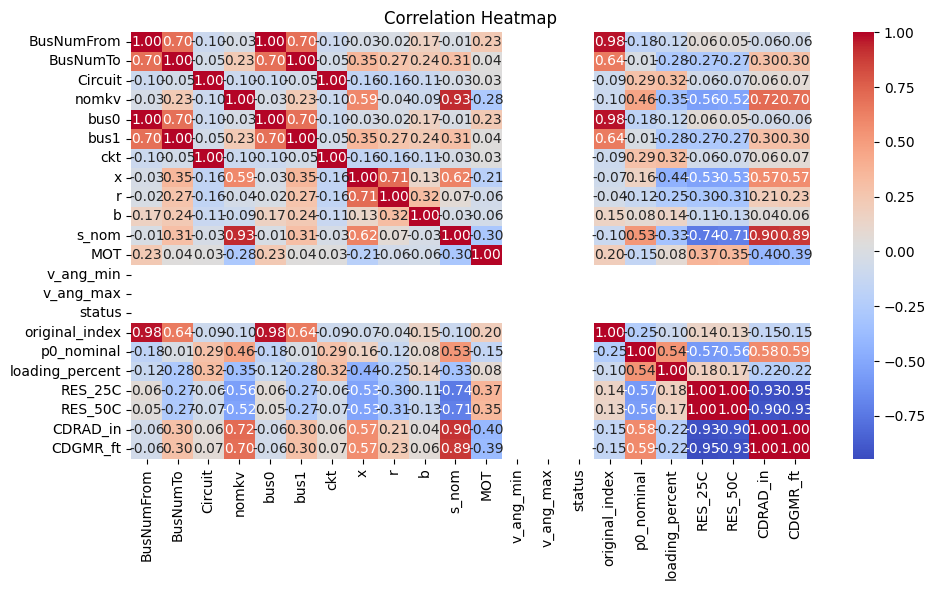

In [ ]:
#Correlation heatmap of merged dataset

#imports
import seaborn as sns
import matplotlib.pyplot as plt

#specify number types
num_columns = geo_df.select_dtypes(include='number').columns

#create plot
plt.figure(figsize=(10,6))

#find correlations
corr = geo_df[num_columns].corr()

#create heatmap with Seaborn
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

#edit layout
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#Notes
    #high correlation between CDRAD_in and s_nom
    #high correlation between CDGMR_ft and s_nom


In [ ]:
from ieee738 import Conductor, ConductorParams
import math
import itertools

# Function to run IEEE 738 calculations
def calculate_line_ratings(geo_df, ambient_env):
    """
    Calculates IEEE-738 thermal ratings for each line in a provided dataframe.

    Parameters
    ----------
    geo_df : pd.DataFrame
        DataFrame containing merged line and conductor data.
        Must include: RES_25C, RES_50C, CDRAD_IN, ConductorName, and optionally Voltage_kV.
    ambient_env : dict
        Dictionary of ambient environmental parameters (e.g., temperature, wind speed, etc.)

    Returns
    -------
    pd.DataFrame
        DataFrame of results with Rating_Amps and Rating_MVA per line.
    """
    results = []

    # Loop over each line in your existing DataFrame
    for _, row in geo_df.iterrows():
        try:
            # --- Conductor-specific parameters
            cond_params = {
                'TLo': 25,
                'THi': 50,
                'RLo': row['RES_25C'] / 5280,  # convert Ohm/mi → Ohm/ft
                'RHi': row['RES_50C'] / 5280,
                'Diameter': row['CDRAD_in'] * 2,  # radius → diameter (inches)
                'Tc': 75,  # Maximum Operating Temp (°C)
            }

            # --- Combine with environment
            cp = ConductorParams(**ambient_env, **cond_params)
            con = Conductor(cp)
            amps = con.steady_state_thermal_rating()
            
            voltage = row.get('nomkv', None)
            if pd.notna(voltage):
                rating_mva = math.sqrt(3) * amps * voltage * 1e3 * 1e-6
            else:
                rating_mva = None


            results.append({
                'LineName': row.get('LineName', None),
                'ConductorName': row['ConductorName'],
                'Voltage_kV': row.get('nomkv', None),
                'Ta': ambient_env['Ta'],
                'WindVelocity': ambient_env['WindVelocity'],
                'WindAngleDeg': ambient_env['WindAngleDeg'],
                'SunTime': ambient_env['SunTime'],
                'Date': ambient_env['Date'],
                'Emissivity': ambient_env['Emissivity'],
                'Absorptivity': ambient_env['Absorptivity'],
                'Direction': ambient_env['Direction'],
                'Atmosphere': ambient_env['Atmosphere'],
                'Elevation': ambient_env['Elevation'],
                'Latitude': ambient_env['Latitude'],
                'Rating_Amps': amps,
                'Rating_MVA': rating_mva,
            })
        
        except Exception as e:
            print(f"⚠️ Error on line {row.get('LineID', '?')} ({row.get('ConductorName', '?')}): {type(e).__name__} - {e}")
            continue


    return pd.DataFrame(results)

In [70]:
# Example ambient environment
ambient_env = {
    'Ta': 25,
    'WindVelocity': 2.0,
    'WindAngleDeg': 90,
    'SunTime': 12,
    'Date': '12 Jun',
    'Emissivity': 0.8,
    'Absorptivity': 0.8,
    'Direction': 'EastWest',
    'Atmosphere': 'Clear',
    'Elevation': 1000,
    'Latitude': 22,
}

# Run the function
line_ratings_df = calculate_line_ratings(geo_df, ambient_env)

# View the results
display(line_ratings_df)

# Optionally save to file
line_ratings_df.to_csv("line_ratings_output34.csv", index=False)

,LineName,ConductorName,Voltage_kV,Ta,WindVelocity,WindAngleDeg,SunTime,Date,Emissivity,Absorptivity,Direction,Atmosphere,Elevation,Latitude,Rating_Amps,Rating_MVA
0,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,795 ACSR 26/7 DRAKE,138.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,902.325181,215.676482
1,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,795 ACSR 26/7 DRAKE,138.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,902.325181,215.676482
2,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,556.5 ACSR 26/7 DOVE,138.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,721.726072,172.509139
3,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,795 ACSR 26/7 DRAKE,138.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,902.325181,215.676482
4,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,795 ACSR 26/7 DRAKE,138.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,902.325181,215.676482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,LAIE69 (29) TO WAHIAWA69 (30) CKT 1,4/0 ACSR 6/1 PENGUIN,69.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,346.516989,41.412767
73,LAIE69 (29) TO HAUULA69 (32) CKT 1,336.4 ACSR 30/7 ORIOLE,69.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,531.517550,63.522463
74,WAIALUA69 (31) TO WAIANAE69 (33) CKT 1,3/0 ACSR 6/1 PIGEON,69.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,308.090098,36.820312
75,WAIANAE69 (33) TO SCHOFIELD69 (34) CKT 1,336.4 ACSR 30/7 ORIOLE,69.0,25,2.0,90,12,12 Jun,0.8,0.8,EastWest,Clear,1000,22,531.517550,63.522463


In [90]:
import numpy as np
import pandas as pd
from ieee738 import Conductor, ConductorParams
import math

def generate_random_env_data(n_samples=500):
    env_list = []
    for _ in range(n_samples):
        env = {
            'Ta': np.random.uniform(15, 30),                  # °C
            'WindVelocity': np.random.uniform(0.1, 22),      # m/s
            'WindAngleDeg': np.random.uniform(0, 90),
            'SunTime': np.random.uniform(0, 24),
            'Date': '12 Jun',
            'Emissivity': np.random.uniform(0.1, 1.0),
            'Absorptivity': np.random.uniform(0.1, 1.0),
            'Direction': np.random.choice(['EastWest', 'NorthSouth']),
            'Atmosphere': np.random.choice(['Clear', 'Industrial']),
            'Elevation': np.random.uniform(2000, 4000),
            'Latitude': np.random.uniform(19, 22)
        }
        env_list.append(env)
    return env_list

def generate_dataset(geo_df, n_samples=500):
    env_list = generate_random_env_data(n_samples)
    all_results = []

    for env in env_list:
        result = calculate_line_ratings(geo_df, env)
        all_results.append(result)
    
    combined = pd.concat(all_results, ignore_index=True)
    return combined

# Example usage
synthetic_df = generate_dataset(geo_df, n_samples=300)
synthetic_df.to_csv("synthetic_line_ratings.csv", index=False)
display(synthetic_df.head())


,LineName,ConductorName,Voltage_kV,Ta,WindVelocity,WindAngleDeg,SunTime,Date,Emissivity,Absorptivity,Direction,Atmosphere,Elevation,Latitude,Rating_Amps,Rating_MVA
0,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,NorthSouth,Clear,2851.948123,19.270505,1088.163900,260.096212
1,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,NorthSouth,Clear,2851.948123,19.270505,1088.163900,260.096212
2,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,556.5 ACSR 26/7 DOVE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,NorthSouth,Clear,2851.948123,19.270505,854.328864,204.204258
3,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,NorthSouth,Clear,2851.948123,19.270505,1088.163900,260.096212
4,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,NorthSouth,Clear,2851.948123,19.270505,1088.163900,260.096212


In [94]:
#Convert conductor column into numeric values
synthetic_df['Direction'] = synthetic_df['Direction'].map({'EastWest': 0, 'NorthSouth': 1})
synthetic_df['Atmosphere'] = synthetic_df['Atmosphere'].map({'Clear': 0, 'Industrial': 1})

conductor_map = {
    "3/0 ACSR 6/1 PIGEON": 1,
    "4/0 ACSR 6/1 PENGUIN": 2,
    "336.4 ACSR 30/7 ORIOLE": 3,
    "556.5 ACSR 26/7 DOVE": 4,
    "795 ACSR 26/7 DRAKE": 5,
    "954 ACSR 54/7 CARDINAL": 6,
    "1272 ACSR 45/7 BITTERN": 7,
    "1590 ACSR 54/19 FALCON": 8
}

# Apply mapping
synthetic_df["ConductorCode"] = synthetic_df["ConductorName"].map(conductor_map)

display(synthetic_df.head())

,LineName,ConductorName,Voltage_kV,Ta,WindVelocity,WindAngleDeg,SunTime,Date,Emissivity,Absorptivity,Direction,Atmosphere,Elevation,Latitude,Rating_Amps,Rating_MVA,ConductorCode
0,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5
1,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5
2,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,556.5 ACSR 26/7 DOVE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,854.328864,204.204258,4
3,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5
4,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5


In [93]:
# Check how many actually matched
print(f"Matched conductors: {merged['ConductorName'].notna().sum()} / {len(df)}")

# Inspect missing matches
missing = df[~df['conductor'].isin(conductor_lib['ConductorName'])]
print("Examples of missing conductor names:")
print(missing['conductor'].unique()[:20])


Matched conductors: 77 / 77


KeyError: 'conductor'

In [ ]:
import os

dfs = []
folder = 'line_rating_data'

for file in os.listdir(folder):
    if file.startswith('line_ratings_output') and file.endswith('.csv'):
        file_path = os.path.join(folder, file)  # ✅ use full path
        df = pd.read_csv(file_path)
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv("combined_line_ratings_output.csv", index=False)  # ✅ add .csv extension


In [99]:
# add s_nom from geo_df to synthetic_df
synthetic_df = synthetic_df.merge(geo_df[['LineName', 's_nom']], on='LineName', how='left')
display(synthetic_df)

# add new loading percent column
synthetic_df['Loading_Percent'] = (synthetic_df['Rating_MVA'] / synthetic_df['s_nom'].max()) * 100

,LineName,ConductorName,Voltage_kV,Ta,WindVelocity,WindAngleDeg,SunTime,Date,Emissivity,Absorptivity,Direction,Atmosphere,Elevation,Latitude,Rating_Amps,Rating_MVA,ConductorCode,s_nom
0,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,228
1,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,228
2,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,556.5 ACSR 26/7 DOVE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,854.328864,204.204258,4,172
3,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,215
4,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,LAIE69 (29) TO WAHIAWA69 (30) CKT 1,4/0 ACSR 6/1 PENGUIN,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,283.233950,33.849716,2,45
23096,LAIE69 (29) TO HAUULA69 (32) CKT 1,336.4 ACSR 30/7 ORIOLE,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,452.713667,54.104492,3,63
23097,WAIALUA69 (31) TO WAIANAE69 (33) CKT 1,3/0 ACSR 6/1 PIGEON,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,247.526253,29.582235,1,40
23098,WAIANAE69 (33) TO SCHOFIELD69 (34) CKT 1,336.4 ACSR 30/7 ORIOLE,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,452.713667,54.104492,3,76


In [100]:
display(synthetic_df)

,LineName,ConductorName,Voltage_kV,Ta,WindVelocity,WindAngleDeg,SunTime,Date,Emissivity,Absorptivity,Direction,Atmosphere,Elevation,Latitude,Rating_Amps,Rating_MVA,ConductorCode,s_nom,Loading_Percent
0,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,228,88.168208
1,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,228,88.168208
2,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,556.5 ACSR 26/7 DOVE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,854.328864,204.204258,4,172,69.221782
3,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,215,88.168208
4,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,795 ACSR 26/7 DRAKE,138.0,17.241789,7.050031,4.127713,4.180905,12 Jun,0.446395,0.435784,1,0,2851.948123,19.270505,1088.163900,260.096212,5,215,88.168208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,LAIE69 (29) TO WAHIAWA69 (30) CKT 1,4/0 ACSR 6/1 PENGUIN,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,283.233950,33.849716,2,45,11.474480
23096,LAIE69 (29) TO HAUULA69 (32) CKT 1,336.4 ACSR 30/7 ORIOLE,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,452.713667,54.104492,3,63,18.340506
23097,WAIALUA69 (31) TO WAIANAE69 (33) CKT 1,3/0 ACSR 6/1 PIGEON,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,247.526253,29.582235,1,40,10.027876
23098,WAIANAE69 (33) TO SCHOFIELD69 (34) CKT 1,336.4 ACSR 30/7 ORIOLE,69.0,17.959801,0.784130,14.766941,11.186266,12 Jun,0.911974,0.644879,0,1,2698.369404,19.495721,452.713667,54.104492,3,76,18.340506


In [101]:
# Correlation analysis
synthetic_df.corr(numeric_only=True)['Loading_Percent'].sort_values(ascending=True)

Atmosphere        -0.067999
Ta                -0.026692
SunTime           -0.014479
Elevation         -0.013372
Absorptivity      -0.009087
Latitude           0.008551
Emissivity         0.037756
Direction          0.040852
WindAngleDeg       0.114601
WindVelocity       0.198986
ConductorCode      0.804259
Voltage_kV         0.836163
s_nom              0.898633
Rating_Amps        0.901530
Rating_MVA         1.000000
Loading_Percent    1.000000
Name: Loading_Percent, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# set x and y
X = synthetic_df[['Voltage_kV','Ta','WindVelocity','WindAngleDeg','SunTime','Emissivity','Absorptivity','Elevation','Latitude', 'Direction', 'Atmosphere', 'ConductorCode', 'Rating_Amps', 'Rating_MVA']]
y = synthetic_df['Loading_Percent']

model = RandomForestRegressor().fit(X, y)
result = permutation_importance(model, X, y)

100%|===================| 23041/23100 [07:19<00:01]        

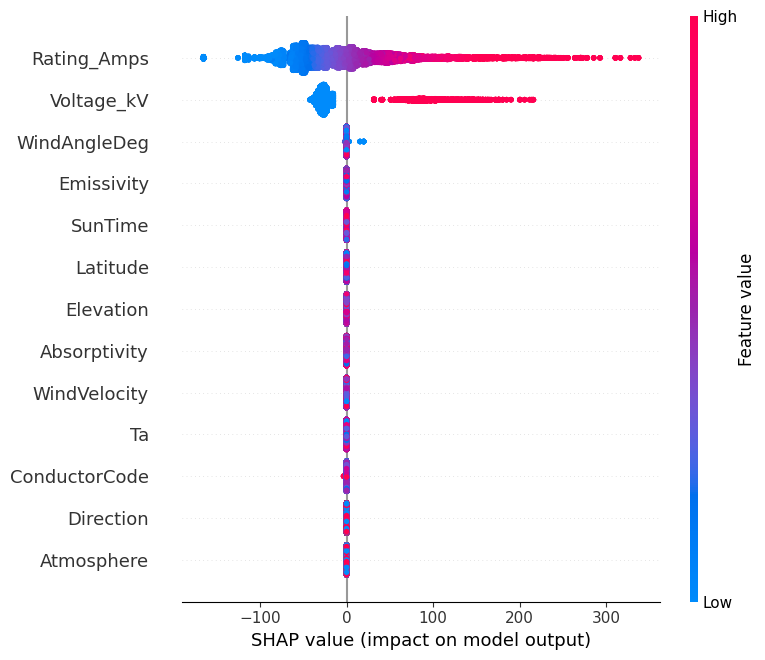

In [98]:
import shap
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [102]:
features = ['Voltage_kV','Ta','WindVelocity','WindAngleDeg','SunTime','Emissivity','Absorptivity','Elevation','Latitude', 'Direction', 'Atmosphere', 'ConductorCode', 'Rating_Amps', 'Rating_MVA']

X = synthetic_df[features]
y = synthetic_df['Loading_Percent']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------
# Prepare your data
# ------------------------
features = ['Voltage_kV','Ta','WindVelocity','WindAngleDeg','SunTime','Emissivity','Absorptivity','Elevation','Latitude', 'Direction', 'Atmosphere', 'ConductorCode', 'Rating_Amps', 'Rating_MVA']


X = synthetic_df[features]
y = synthetic_df['Rating_MVA']

# ------------------------
# Define K-Fold
# ------------------------
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------
# Define models
# ------------------------
models = {
    # Polynomial Regression (degree=2)
    "Polynomial (deg=2)": Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    
    # Random Forest
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    
    # XGBoost
    "XGBoost": XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    
    # Support Vector Regression (RBF kernel)
    "SVR (RBF)": Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(C=10, gamma='scale'))
    ]),
    
    # Neural Network
    "Neural Network (MLP)": Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1500, random_state=42))
    ]),
}

# ------------------------
# Train and Evaluate with K-Fold
# ------------------------
results = []

for name, model in models.items():
    print(f"🔹 Evaluating {name}...")
    
    # R² and RMSE via cross-validation
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    neg_mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    
    rmse_scores = np.sqrt(-neg_mse_scores)
    
    results.append({
        'Model': name,
        'Mean R²': np.mean(r2_scores),
        'Std R²': np.std(r2_scores),
        'Mean RMSE': np.mean(rmse_scores),
        'Std RMSE': np.std(rmse_scores)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Mean R²', ascending=False)
print("\n🏆 Model Comparison Results:")
display(results_df)


🔹 Evaluating Polynomial (deg=2)...
🔹 Evaluating Random Forest...
🔹 Evaluating XGBoost...
🔹 Evaluating SVR (RBF)...
🔹 Evaluating Neural Network (MLP)...

🏆 Model Comparison Results:


,Model,Mean R²,Std R²,Mean RMSE,Std RMSE
0,Polynomial (deg=2),1.000000,0.000000e+00,4.527403e-13,1.824328e-13
1,Random Forest,1.000000,1.397960e-08,2.951132e-02,3.117000e-03
2,XGBoost,0.999995,3.907049e-07,2.477626e-01,1.205742e-02
4,Neural Network (MLP),0.999993,2.518758e-06,2.930960e-01,5.558332e-02
3,SVR (RBF),0.995505,3.720536e-04,7.489841e+00,3.949144e-01


In [108]:
import joblib

# Define features and target
features = [
    'Voltage_kV', 'Ta', 'WindVelocity', 'WindAngleDeg', 'SunTime', 
    'Emissivity', 'Absorptivity', 'Elevation', 'Latitude', 'Direction', 
    'Atmosphere', 'ConductorCode', 'Rating_Amps', 'Rating_MVA'
]

X = synthetic_df[features]
y = synthetic_df['Rating_MVA']

# Define K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define model pipeline
name = "Polynomial (deg=2)"
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

print(f"🔹 Evaluating {name}...")

# Cross-validation scores
r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
neg_mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

# Store results
results = []
results.append({
    'Model': name,
    'Mean R²': np.mean(r2_scores),
    'Std R²': np.std(r2_scores),
    'Mean RMSE': np.mean(rmse_scores),
    'Std RMSE': np.std(rmse_scores)
})

# Print summary
print("✅ Cross-validation results:")
print(pd.DataFrame(results))

# Train model on full dataset (so we can save it)
model.fit(X, y)

# Save trained model
filename = 'trained_model.joblib'
joblib.dump(model, filename)
print(f"💾 Model saved to {filename}")

🔹 Evaluating Polynomial (deg=2)...
✅ Cross-validation results:
                Model  Mean R²  Std R²     Mean RMSE      Std RMSE
0  Polynomial (deg=2)      1.0     0.0  4.527403e-13  1.824328e-13
💾 Model saved to trained_model.joblib
